In [3]:
import seaborn as sns
import os
from pathlib import Path
from validation_utils import *

work_dir = os.path.expanduser("~/Workspace/Data/Scenarios")
study_area = "sfbay"
project_dir = work_dir + '/' + study_area
input_dir = project_dir + '/input'
output_dir = project_dir + '/output'
plots_dir = output_dir + '/plots'
Path(input_dir).mkdir(parents=True, exist_ok=True)
Path(output_dir).mkdir(parents=True, exist_ok=True)
Path(plots_dir).mkdir(parents=True, exist_ok=True)
#
regional_npmrds_station_geo_input = input_dir + '/regional_npmrds_station_map.geojson'
regional_npmrds_data_input = input_dir + '/regional_npmrds_data.csv'
npmrds_hourly_speed_input = input_dir + '/npmrds_hourly_speeds.csv'
beam_network_car_links_geo_input = input_dir + '/beam_network_car_links_map.geojson'
beam_npmrds_network_map_geo_input = input_dir + '/beam_npmrds_network_map.geojson'
npmrds_hourly_speed_by_road_class_input = input_dir + '/npmrds_hourly_speed_by_road_class.csv'

# ########## Initialize
setup = SpeedValidationSetup(npmrds_hourly_speed_csv_path=npmrds_hourly_speed_input,
                             beam_npmrds_network_map_geo_path=beam_npmrds_network_map_geo_input,
                             npmrds_hourly_speed_by_road_class_csv_path=npmrds_hourly_speed_by_road_class_input,
                             link_stats_paths_and_labels_list=[
                                 ("BEAM_2024",
                                  work_dir + "/sfbay/runs/sfbay-simp-jdeq-0.07__2024-02-21_19-22-50_obb/10.linkstats.csv.gz")
                             ],
                             demand_sample_size=0.1,
                             assume_daylight_saving=True)

Loading data ...
Execution time of prepare_npmrds_and_beam_data: 0.6349433700243632min


Execution time of get_hourly_average_speed: 0.010713295141855875min


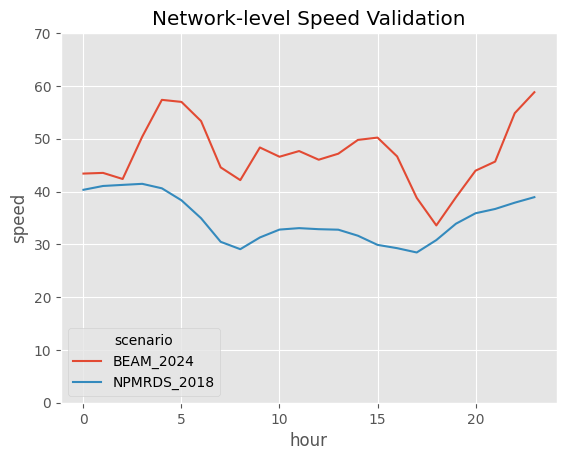

In [4]:
# #########################################
# ########## Network-level speed validation
# #########################################
hourly_speed = setup.get_hourly_average_speed()

# Plot hourly network speed
plt.figure()
sns.lineplot(x='hour', y='speed', hue='scenario', data=hourly_speed, errorbar=('ci', 95))
plt.ylim([0, 70])
plt.title("Network-level Speed Validation")
plt.savefig(plots_dir + '/beam_npmrds_network_speed_validation.png', dpi=200)
plt.show(block=False)

Execution time of get_hourly_average_speed_by_road_class: 0.02321671644846598min


<Figure size 640x480 with 0 Axes>

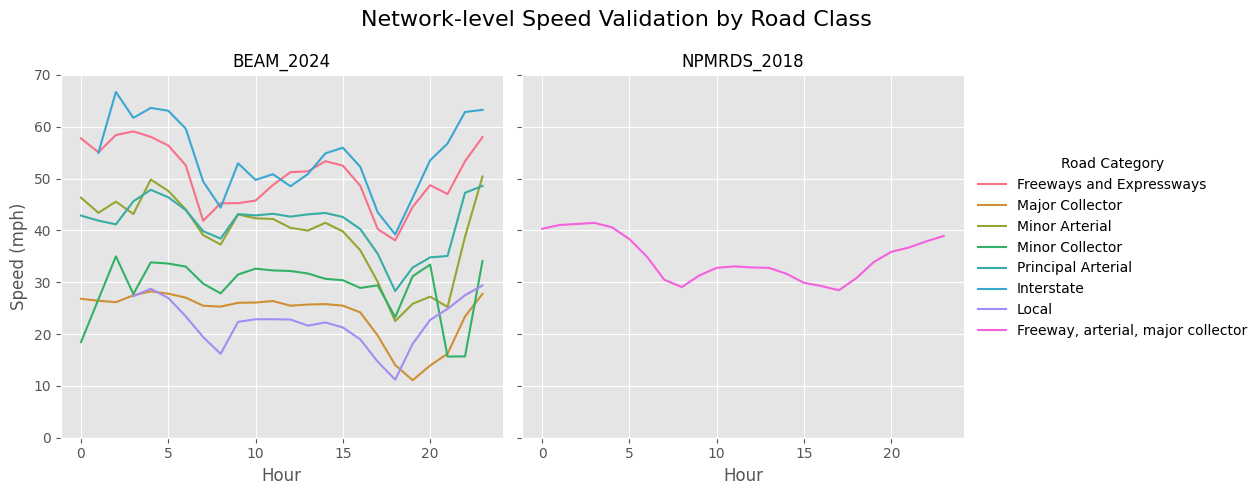

In [5]:
hourly_speed_by_road_class = setup.get_hourly_average_speed_by_road_class()

# plot hourly network speed by road class
plt.figure()
g = sns.relplot(x='hour', y='speed', hue='road_class', col='scenario', kind="line",
                data=hourly_speed_by_road_class,
                errorbar=('ci', 95), facet_kws={'sharey': True, 'sharex': True})
g.set_titles("{col_name}")
g.fig.suptitle('Network-level Speed Validation by Road Class', fontsize=16, y=0.98)
g.set_xlabels("Hour")
g.set_ylabels("Speed (mph)")
g._legend.set_title("Road Category")
plt.subplots_adjust(top=0.85)
plt.ylim([0, 70])
plt.savefig(plots_dir + '/beam_npmrds_network_speed_road_class_validation.png', dpi=200)

hourly_speed_by_road_class.to_csv(output_dir + '/beam_npmrds_network_speed_road_class_validation.csv', index=False)

Execution time of get_hourly_link_speed: 2.925755767027537min


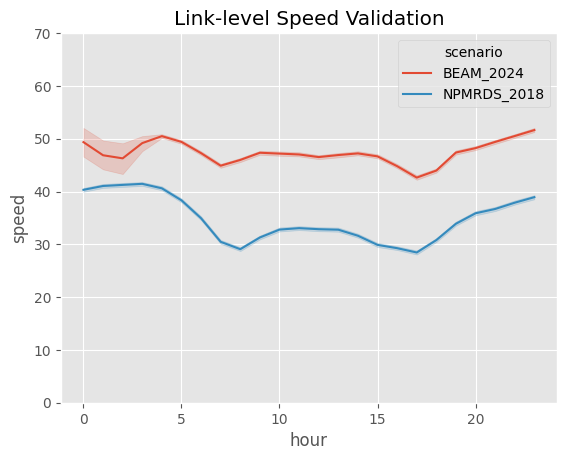

In [6]:
# ######################################
# ########## Link-level speed validation
# ######################################
hourly_link_speed = setup.get_hourly_link_speed()

# Plot hourly link speed
plt.figure()
sns.lineplot(x='hour', y='speed', hue='scenario', data=hourly_link_speed, errorbar=('ci', 95))
plt.ylim([0, 70])
plt.title("Link-level Speed Validation")
plt.savefig(plots_dir + '/beam_npmrds_link_speed_validation.png', dpi=200)


In [ ]:
hourly_link_speed_by_road_class = setup.get_hourly_link_speed_by_road_class()

# Plot hourly link speed by road class
plt.figure()
road_class_order = list(fsystem_to_roadclass_lookup.values())
g = sns.relplot(x='hour', y='speed', hue='road_class', col='scenario', kind="line", hue_order=road_class_order,
                data=hourly_link_speed_by_road_class,
                errorbar=('ci', 95), facet_kws={'sharey': True, 'sharex': True})
g.set_titles("{col_name}")
g.fig.suptitle('Link-Level Speed Validation by Road Class', fontsize=16, y=0.98)
g.set_xlabels("Hour")
g.set_ylabels("Speed (mph)")
g._legend.set_title("Road Category")
plt.subplots_adjust(top=0.85)
plt.ylim([0, 70])
plt.savefig(plots_dir + '/beam_npmrds_link_speed_road_class_validation.png', dpi=200)

hourly_link_speed_by_road_class.to_csv(output_dir + '/beam_npmrds_link_speed_road_class_validation.csv', index=False)